In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error as mse

In [2]:
df = pd.read_csv('Assignment3.csv')
for col in df.columns:
    df[col] = df[col].astype(float)
df

,x1,x2,x3,x4,x5,y
0,7.11,-447.71,135.66,92.41,96.04,9131.40
1,7.06,-455.33,94.49,91.76,92.16,9001.86
2,6.89,-466.86,186.25,89.54,100.00,8595.85
3,7.25,-440.53,176.83,94.24,84.64,9469.94
4,7.24,-445.92,185.90,94.11,88.36,9448.98
...,...,...,...,...,...,...
96,7.86,479.03,187.04,102.18,88.36,11168.68
97,8.37,489.50,159.51,108.85,81.00,12605.81
98,8.32,496.95,17.12,108.16,92.16,12467.96
99,8.37,546.88,104.18,108.83,100.00,12631.05


In [3]:
def SSE(y, yhat):
    return np.sum((y-yhat)**2)

### Task 1

In [4]:
xx = np.array(df[['x1','x2','x3','x4','x5']])
yy = np.expand_dims(df['y'], 1)

In [5]:
model1 = LinearRegression()
model1.fit(xx, yy)
yhat = model1.predict(xx)
loss = mse(yy, yhat)**0.5
print("Beta :", model1.coef_, " Bias :", model1.intercept_)
print("RMSE :",loss)

Beta : [[-1.06736899e+03  1.00659916e-01 -5.71765977e-02  2.84363302e+02
   1.62848730e+00]]  Bias : [-9655.31030896]
RMSE : 26.67698999975849


### Task 2

In [6]:
df.describe()

,x1,x2,x3,x4,x5,y
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,7.548713,23.755050,111.371386,98.133762,34.000000,10244.460297
std,0.380115,292.850177,55.812213,4.942089,30.557704,1022.766123
min,6.680000,-466.860000,9.800000,86.830000,0.000000,8062.540000
25%,7.250000,-208.890000,66.380000,94.240000,6.760000,9469.940000
50%,7.530000,38.950000,104.180000,97.900000,25.000000,10187.660000
75%,7.800000,262.920000,168.160000,101.420000,57.760000,10866.630000
max,8.370000,546.880000,195.810000,108.850000,100.000000,12631.050000


#### Check correlation matrix

In [7]:
all_data = np.concatenate((xx, yy), axis=1)
corr = np.corrcoef(all_data.T)
print(corr)

[[ 1.          0.70227559 -0.22369731  0.99997833 -0.00144945  0.9982136 ]
 [ 0.70227559  1.         -0.03260292  0.70319638  0.00261306  0.71670271]
 [-0.22369731 -0.03260292  1.         -0.22480781  0.08132155 -0.22026513]
 [ 0.99997833  0.70319638 -0.22480781  1.         -0.00177718  0.99826603]
 [-0.00144945  0.00261306  0.08132155 -0.00177718  1.          0.04660974]
 [ 0.9982136   0.71670271 -0.22026513  0.99826603  0.04660974  1.        ]]


### Visualize the relationships through a pair-plot.

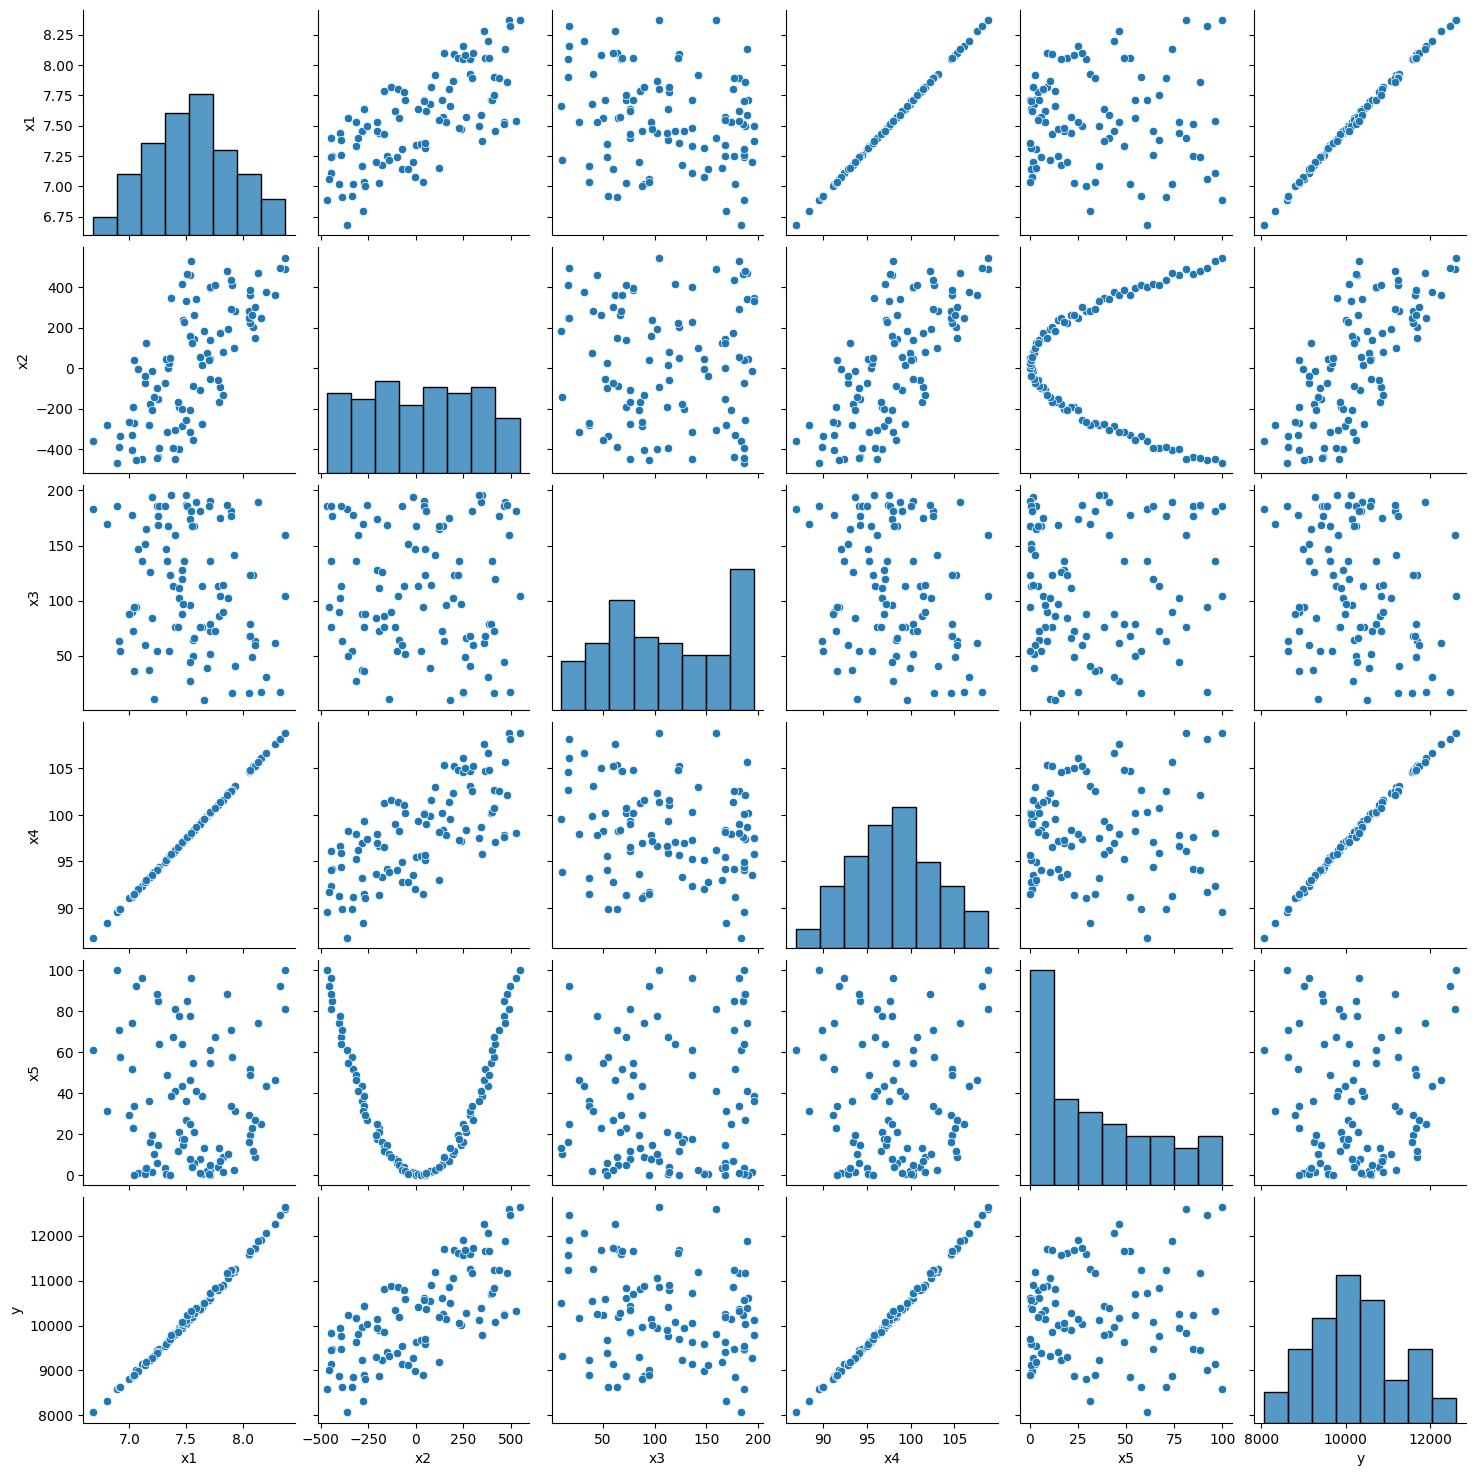

In [8]:
sb.pairplot(df)

It is evident that x1 and x4 are highly correlated with y and with each other while x5 is proportional to x2^2 with x2 being slightly correlated with y so there can be a potential correlation in x5^0.5 and y. x3 seems to have no correlation with y so better to drop it. Since x4 is slightly more correlated with y than x1, we can choose to drop x1 as well.

In [9]:
x2 = np.array(df['x2']).reshape(-1,1)
x4 = np.array(df['x4']).reshape(-1,1)
x5 = np.array(df['x5']).reshape(-1,1)
y = np.array(df['y']).reshape(-1,1)

#### Using only x4 to predict y

In [10]:
model21 = LinearRegression()
model21.fit(x4, y)
yhat21 = model21.predict(x4)
loss21 = mse(y, yhat21)**0.5

print("Beta :", model21.coef_, " Bias :", model21.intercept_)
print("RMSE :",loss21)

Beta : [[206.59131629]]  Bias : [-10029.12284431]
RMSE : 59.90508120313209


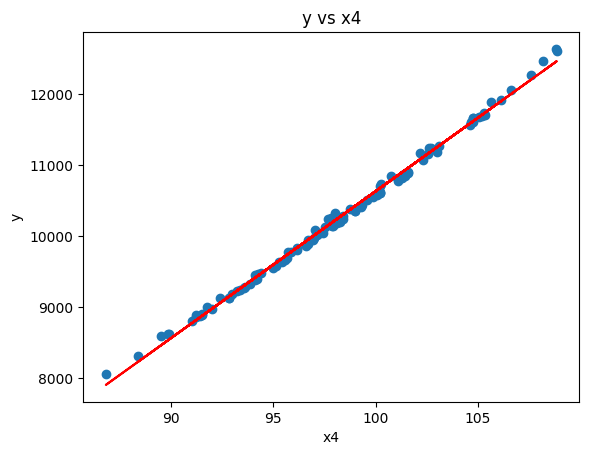

In [11]:
plt.plot(x4,yhat21,'r')
plt.scatter(x4,y)
plt.xlabel('x4')
plt.ylabel('y')
plt.title('y vs x4')
plt.show()

The loss is pretty high here!

Let's go for feature engineering now: form a feature $x_6 = \alpha_1 x_5^{1/2} + \alpha_2$ or $x_6 = \alpha_1 x_5^{1/4} + \alpha_2$

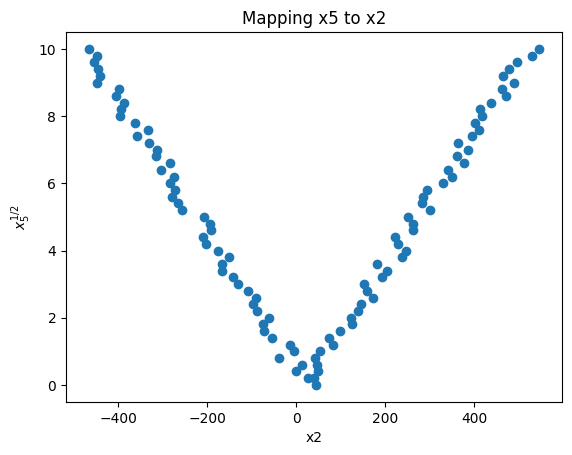

In [12]:
x6 = np.array(x5**0.5)

plt.scatter(x2, x6)
plt.xlabel('x2')
plt.ylabel('$x_5^{1/2}$')
plt.title('Mapping x5 to x2')
plt.show()

The modulus while taking even root is creating an issue - fix it

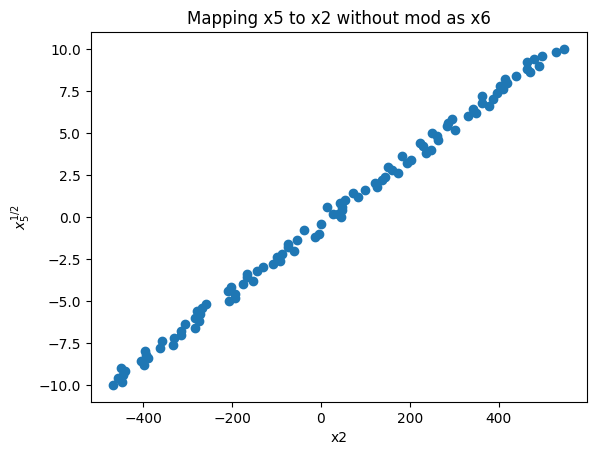

In [13]:
x6 = [x6[i] * -1 if x2[i] < 0 else x6[i] for i in range(len(x2))]

plt.scatter(x2, x6)
plt.xlabel('x2')
plt.ylabel('$x_5^{1/2}$')
plt.title('Mapping x5 to x2 without mod as x6')
plt.show()

The fit is sufficiently linear so better we go with sq root function

In [14]:
x6 = np.array(x6).flatten()
df1 = df.assign(x6=x6)

Linear search for optimum power of x4 as it shows quite high correlation with y

In [15]:
alpha_range = np.arange(0, 6)
alphas_mse = np.empty((len(alpha_range),2))
best_alpha = None
lowest_mse = float('inf')

for i, alpha in enumerate(alpha_range):
    df1['x7'] = df1['x1']*df1['x4']
    df1['x8'] = df1['x4']**alpha

    xx_new = np.array(df1[['x1','x2','x3','x4','x5','x6','x7','x8']])
    yy_new = np.expand_dims(df1['y'], 1)

    X_train, X_test, y_train, y_test = train_test_split(xx_new, yy_new, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse_loss = mse(y_test, y_pred)

    alphas_mse[i] = [alpha, mse_loss]
    if mse_loss < lowest_mse:
        best_alpha = alpha
        lowest_mse = mse_loss

print(f"Best alpha: {best_alpha}")
print(f"Lowest MSE: {lowest_mse**0.5}")

Best alpha: 2
Lowest MSE: 0.5411411171093552


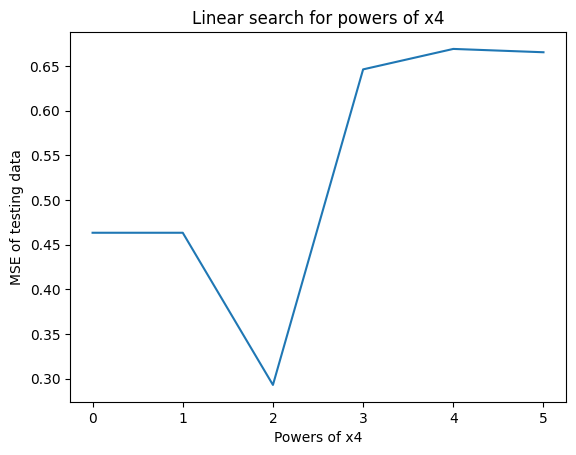

In [16]:
plt.plot(alphas_mse[:,0],alphas_mse[:,1])
plt.xlabel('Powers of x4')
plt.ylabel('MSE of testing data')
plt.title('Linear search for powers of x4')
plt.show()

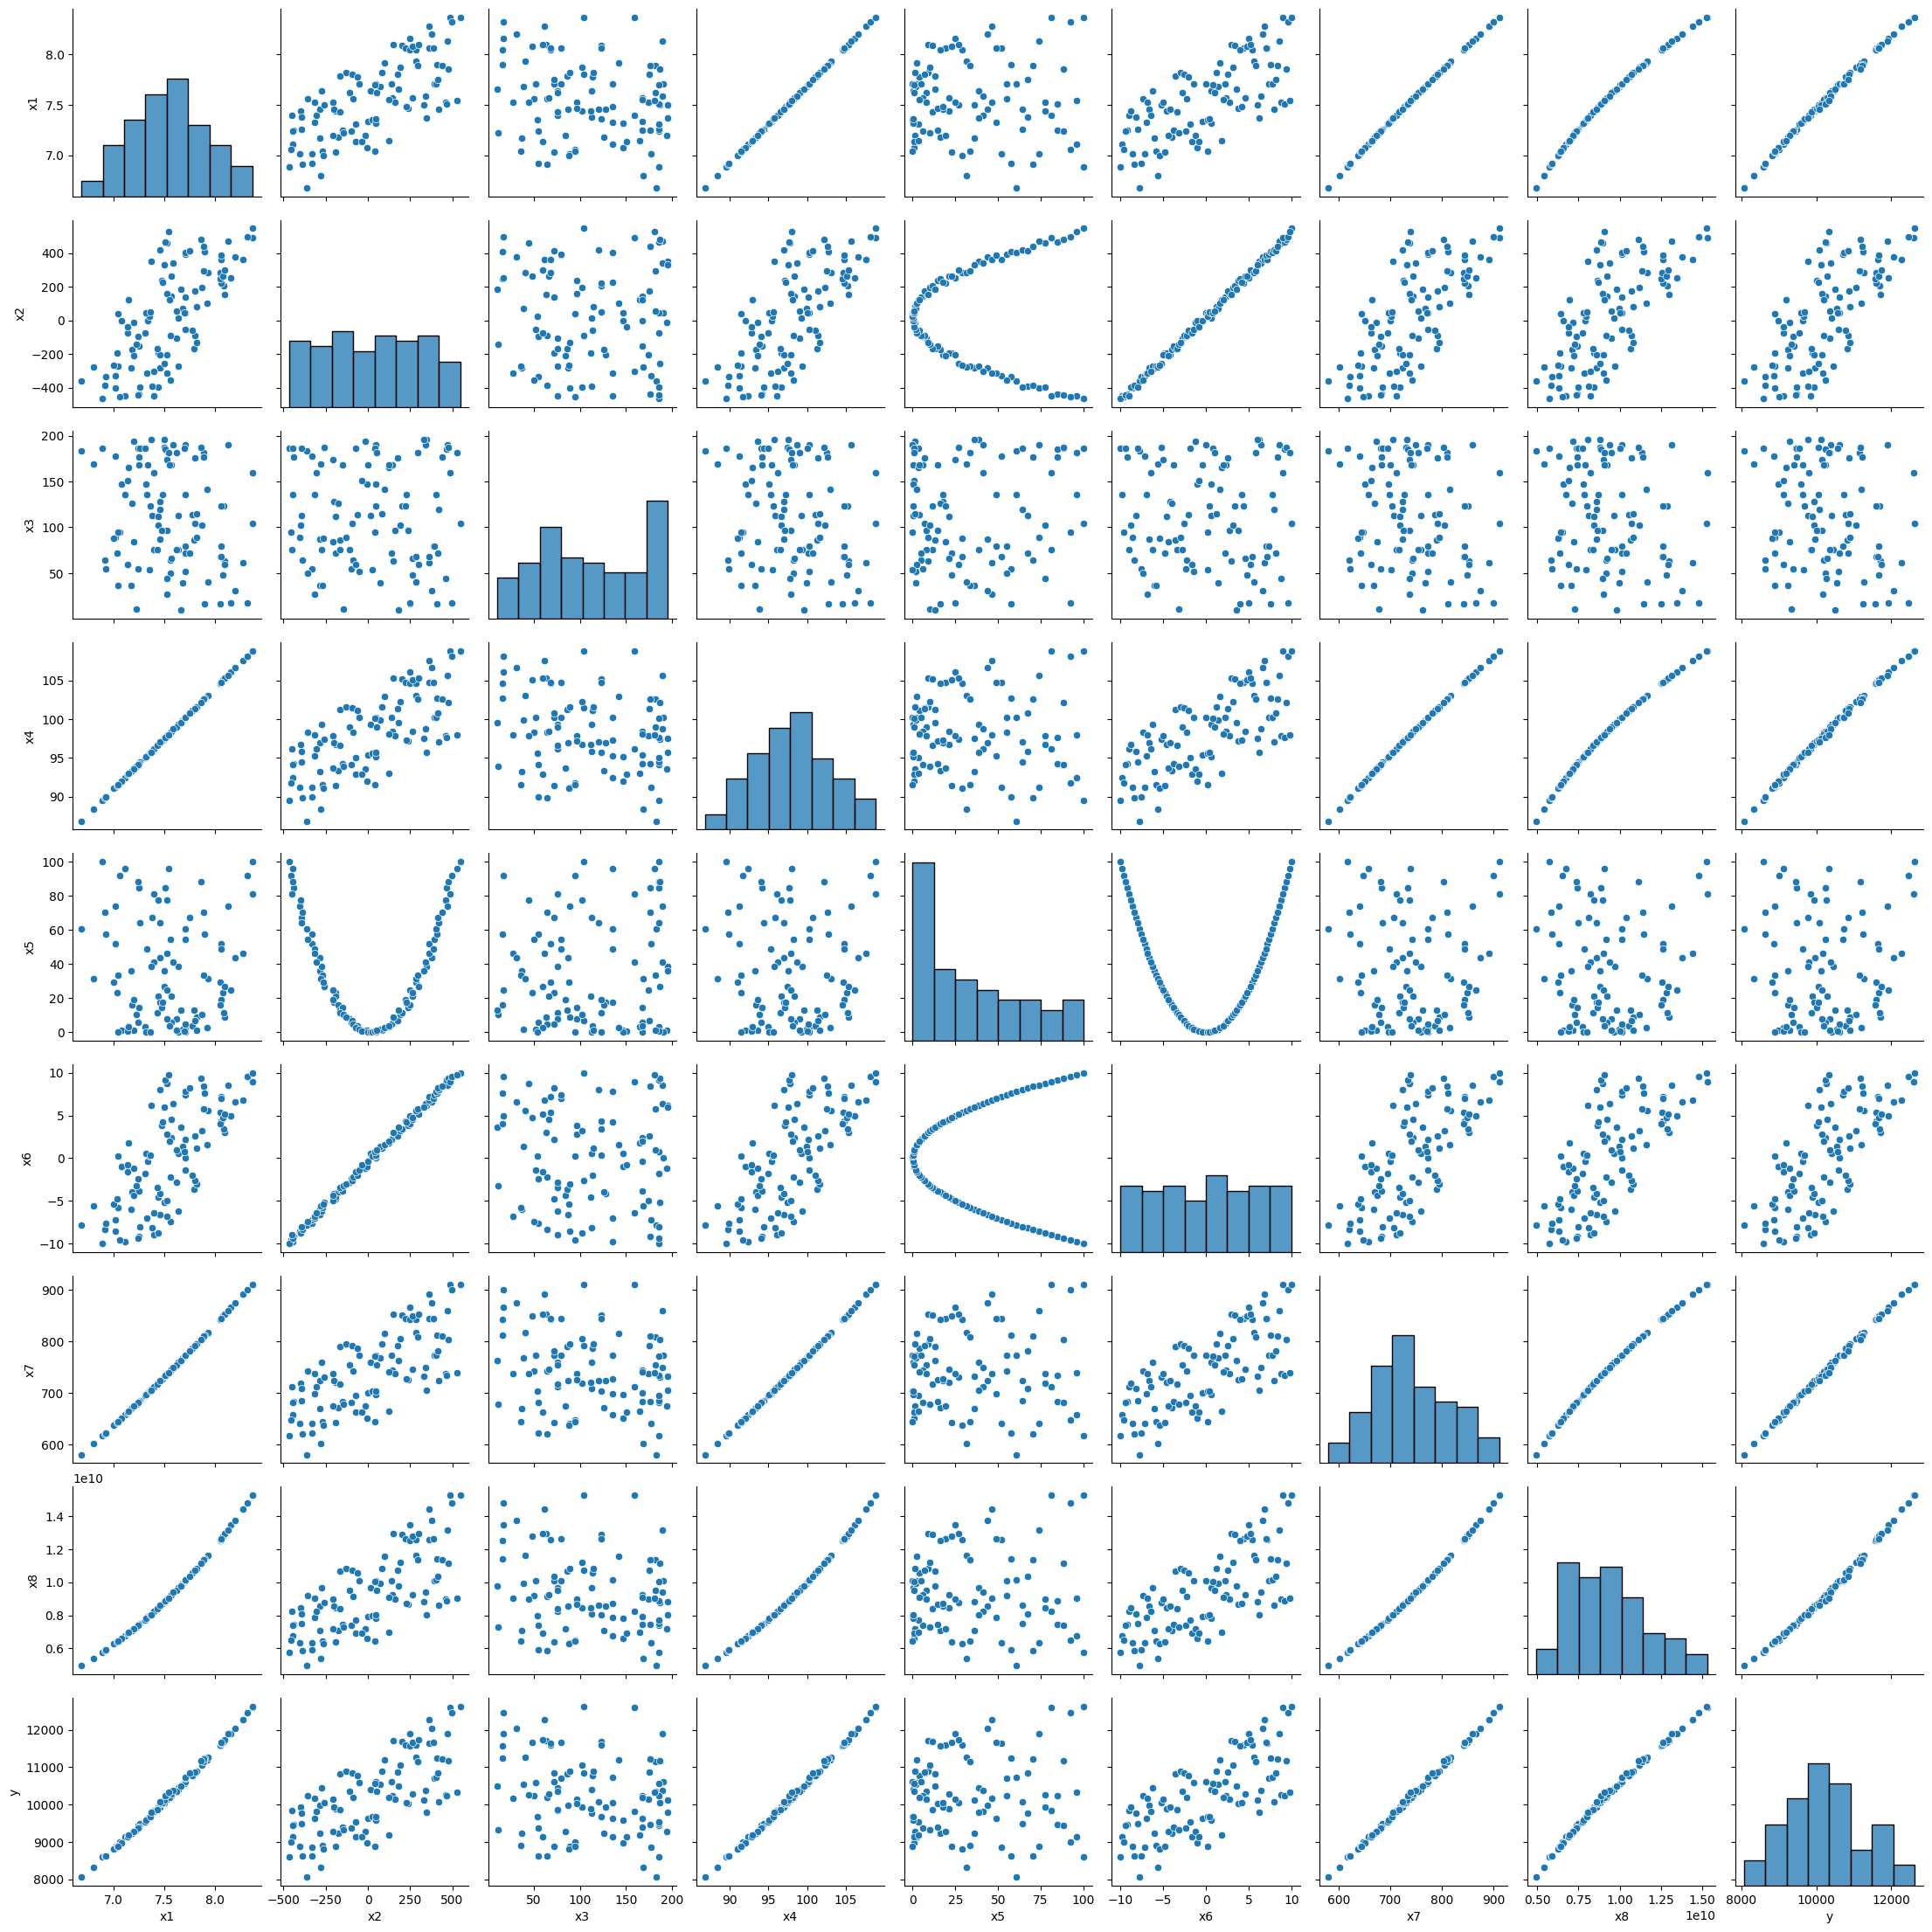

In [17]:
df1 = df1[['x1','x2','x3','x4','x5','x6','x7','x8','y']]
sb.pairplot(df1)

In [18]:
xx_new = np.array(df1[['x1','x2','x3','x4','x5','x6','x7','x8']])
yy_new = np.expand_dims(df1['y'], 1)

X_train, X_test, y_train, y_test = train_test_split(xx_new, yy_new, test_size=0.2, random_state=42)

In [19]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
yhat_train = model2.predict(X_train)
rmse_train = mse(y_train, yhat_train)**0.5

print("Beta :", model2.coef_, " Bias :", model2.intercept_)

Beta : [[-1.06210032e+03  9.39441727e-02  7.38807795e-04  1.13975977e+02
   1.29925180e+00  2.89584259e-01  1.06453466e+01  1.88198317e-08]]  Bias : [-1050.82123152]


In [20]:
yhat_test = model2.predict(X_test)
rmse_test = mse(y_test,yhat_test)**0.5
r2 = r2_score(y_test, yhat_test)

print("R2 score:",r2)
print("RMSE on training data:",rmse_train)
print('RMSE on testing data:',rmse_test)
print("SSE on training data:",SSE(y_train, yhat_train))
print("SSE on testing data:",SSE(y_test, yhat_test))

R2 score: 0.9999996124675258
RMSE on training data: 0.6096648284175009
RMSE on testing data: 0.8157958416156424
SSE on training data: 29.735296240747264
SSE on testing data: 13.975979959144864


In [21]:
n = len(y_test)
p = X_test.shape[1] 
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R2 score:",adjusted_r2)

Adjusted R2 score: 0.9999993541125429


### Task 4

Running LazyRegressor on original data

In [22]:
X = df[['x1', 'x2', 'x3','x4','x5']]
y = df['y']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from lazypredict.Supervised import LazyRegressor

reg_orig = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg_orig.fit(X_train1, X_test1, y_train1, y_test1)
best_model = models.sort_values(by='R-Squared', ascending=False).iloc[0]

print("Lazy regressor on original data:")
print(models)
print("Best Model:", best_model)

100%|██████████| 42/42 [00:01<00:00, 28.17it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 131
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 5
[LightGBM] [Info] Start training from score 10210.802649
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

The given data suggests that the least RMSE reached is 43.02 by LASSO model while LinearRegression gives an RMSE of 44.73. The difference is mainly by the weights made 0 for useless features by LASSO by the application of L1 regularisation. Lets try once by the new dataset we prepared.

Running LazyRegressor on new data after adding the new features

In [24]:
reg_new = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models1, predictions1 = reg_new.fit(X_train, X_test, y_train, y_test)
best_model1 = models1.sort_values(by='R-Squared', ascending=False).iloc[0]

print("Lazy regressor after adding neew features in data:")
print(models1)
print("Best Model:", best_model1)

100%|██████████| 42/42 [00:01<00:00, 22.35it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 216
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 8
[LightGBM] [Info] Start training from score 10210.802649
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

The LASSOLarsCV and LASSOLarsIC models had the lowest RMSE of 0.84, which matched the LinearRegression model. The regularization of LASSO models lowers overfitting and enhances generalization, resulting in their effectiveness while having equal RMSE values. This regularization aids in managing model complexity and increasing robustness.